<a href="https://colab.research.google.com/github/manishareddynarayan/Manisha_INFO5731_Fall2021/blob/main/ManishaNarayan_In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
!pip install pyLDAvis


     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 37.4 MB/s 
     |████████████████████████████████| 15.7 MB 57 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=9a5b3d3398ec4d866038fad9788956a24b993e3c9e21c3525ea2ed2def39779c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into

In [ ]:
# Write your code here

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)



In [63]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
# Importing stop words
from nltk.corpus import stopwords
engStopWords = stopwords.words('english')
engStopWords.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# Import Dataset
df = pd.read_csv('cleanedData.csv', encoding = "ISO-8859-1")
df.head(10)

# Convert to list
docData = df['colmn'].tolist()
dataItems = []

for line in docData:
  dataItems.append(gensim.utils.simple_preprocess(str(line), deacc=True))
biGram = gensim.models.Phrases(dataItems, min_count=5, threshold=100)
biGram_model = gensim.models.phrases.Phraser(biGram)
# getting values after removal of stop words
afterStopwordRemoval = [[word for word in simple_preprocess(str(doc)) if word not in engStopWords] for doc in dataItems]
biGrams = [biGram_model[doc] for doc in afterStopwordRemoval]
nlp = spacy.load('en', disable=['parser', 'ner'])
allowedPostages=['NOUN', 'ADJ', 'VERB', 'ADV']
afterLemmatization = []

for sent in biGrams:
  doc = nlp(" ".join(sent)) 
  afterLemmatization.append([token.lemma_ for token in doc if token.pos_ in allowedPostages])
id2word = corpora.Dictionary(afterLemmatization)
texts = afterLemmatization
corpus = [id2word.doc2bow(text) for text in afterLemmatization]
print(corpus[:1])
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

IDAMmodel = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, random_state=100, update_every=1, chunksize=100,
                                           passes=10, alpha='auto', per_word_topics=True)

print('\nPerplexity: ', IDAMmodel.log_perplexity(corpus)) 
coherenceIDAModel = CoherenceModel(model=IDAMmodel, texts=after_lemmatization, dictionary=id2word, coherence='c_v')
coherenceIDA = coherenceIDAModel.get_coherence()
print('\nCoherence Score: ', coherenceIDA)


[[]]

Perplexity:  -6.606972144745898

Coherence Score:  0.5064146214652053


In [50]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

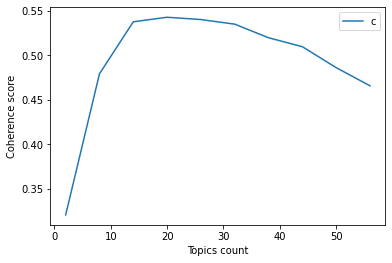

In [65]:
# downloading mallet and unzipping it.
# considering data from bin/mallet
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
malletPath = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

# defining to compute the Coherence Values by taking multiple inputs
def computeCoherenceValuesLDA(dictionary, corpus, texts, limit, start=2, step=3):
    cohValues = []
    modelList = []
    for numberTopics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=numberTopics, id2word=id2word)
        modelList.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        cohValues.append(coherencemodel.get_coherence())
    return modelList, cohValues
modelList, cohValues = computeCoherenceValuesLDA(dictionary=id2word, corpus=corpus, texts=after_lemmatization, start=2, limit=60, step=6)

# taking values from above and plotting the graph
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, cohValues)
# giving labels to axis
plt.xlabel("Topics count")
plt.ylabel("Coherence score")
plt.legend(("cohValues"), loc='best')
plt.show()

In [66]:
# to get the topics count and coherence values
for numberOfTopics, cv in zip(range(2, 60, 6), cohValues):
  print("Topics Count:", numberOfTopics, " - Coherence Value:", round(cv, 4))
IDAMmodel = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=14, random_state=100, update_every=1,
                                           chunksize=100, passes=10, alpha='auto', per_word_topics=True)

pprint(IDAMmodel.print_topics())
doc_lda = IDAMmodel[corpus]
pyLDAvis.enable_notebook()
# for visualisation
visuals = pyLDAvis.gensim_models.prepare(IDAMmodel, corpus, id2word)
visuals

Num Topics: 2  - Coherence Value: 0.3204
Num Topics: 8  - Coherence Value: 0.4791
Num Topics: 14  - Coherence Value: 0.5375
Num Topics: 20  - Coherence Value: 0.5426
Num Topics: 26  - Coherence Value: 0.54
Num Topics: 32  - Coherence Value: 0.5348
Num Topics: 38  - Coherence Value: 0.5195
Num Topics: 44  - Coherence Value: 0.5095
Num Topics: 50  - Coherence Value: 0.4859
Num Topics: 56  - Coherence Value: 0.4655
[(0,
  '0.096*"crop" + 0.059*"grow" + 0.042*"levy" + 0.039*"may" + 0.035*"common" + '
  '0.033*"law" + 0.029*"gather" + 0.026*"attach" + 0.024*"write" + '
  '0.022*"contract"'),
 (1,
  '0.095*"result" + 0.082*"history" + 0.027*"montgomery" + 0.027*"try" + '
  '0.014*"say" + 0.014*"court" + 0.014*"affirm" + 0.014*"waiver" + '
  '0.014*"wage" + 0.005*"negative"'),
 (2,
  '0.044*"filing" + 0.044*"farm" + 0.044*"raise" + 0.022*"number" + '
  '0.022*"page" + 0.022*"quote" + 0.022*"authority" + 0.022*"table" + '
  '0.022*"grain" + 0.022*"render"'),
 (3,
  '0.171*"case" + 0.062*"citat

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.191803  0.016445       1        1  34.141380
9      0.031259  0.108287       2        1  16.234790
0      0.210349 -0.080405       3        1  14.452686
8      0.089864  0.018426       4        1  10.303309
5     -0.090092  0.034658       5        1   6.103140
3     -0.102581  0.111968       6        1   4.766438
7      0.059275 -0.036950       7        1   3.260882
11    -0.038768  0.009383       8        1   2.745004
2     -0.136568 -0.195039       9        1   2.489811
4     -0.055996  0.011784      10        1   2.003240
1     -0.048370  0.001396      11        1   1.196021
6     -0.034640 -0.000779      12        1   1.132054
10    -0.046817  0.001754      13        1   0.836044
12    -0.028718 -0.000928      14        1   0.335200, topic_info=          Term       Freq      Total Category  logprob  loglift
16        case  18.000000  18.000000  Default  30.0000  30.0000
4         crop  38.000000  38.000000  Default  29.0000  29.0000
7         grow  15.000000  15.000000  Default  28.0000  28.0000
17        cite   9.000000   9.000000  Default  27.0000  27.0000
44   execution  39.000000  39.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
183       last   0.008309   2.662203  Topic14  -6.1731  -0.0714
279       foot   0.008309   2.247663  Topic14  -6.1731   0.0979
73    property   0.008309   7.067048  Topic14  -6.1731  -1.0477
264     debtor   0.008309   6.498382  Topic14  -6.1731  -0.9638
263        cut   0.008309   2.247662  Topic14  -6.1731   0.0979

[657 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
212       1  0.826151  absence
22        5  0.812661   absent
214       1  0.826141  acquire
23        5  0.812658     acre
109       1  0.404070      act
...     ...       ...      ...
96        3  0.767134    write
96        5  0.191783    write
211      10  0.708616     year
105       1  0.516968      yet
459       9  0.758780    yield

[375 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 10, 1, 9, 6, 4, 8, 12, 3, 5, 2, 7, 11, 13])


**Summarization of LDA Topics**
1. laws and contracts about levying of charges
2. History of negative wage waviers in montgomery
3. Authority for grain farms
4. Indorsers for unquestionable judgment
5. Plaintiffs prevail over the other party
6. Issues and trails about cotton laborer
7. Adduced for cotton growth in Autauga
8. Seizures of crop growth, their trails and execution
9. Negative treatment and execution of debtors
10. Sheriff's doubt on laws for selling crop
11. Claim of original crop work in montgomery
12. Attorneys and court dissent for reverse document 
13. levying charges and execution of laws for crops growth
14. Execution of crop claimants, possession of contracts from defandants.

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [69]:
# Write your code here
from gensim.models import LsiModel
LSAModel = LsiModel(corpus, 20, id2word)

In [72]:
# defining compute for Coherence Values in LSI
def computeCoherenceValuesLSI(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    cohValues = []
    modelList = []
#providning start,stop and step
    for num_topics in range(start, stop, step):
        # generate LSA model
        LSAModel = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
        modelList.append(LSAModel)
        coherencemodel = CoherenceModel(model=LSAModel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        cohValues.append(coherencemodel.get_coherence())
    return modelList, cohValues

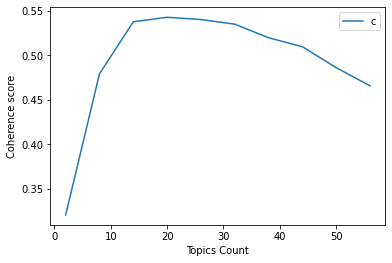

In [73]:
# taking all the values from above and plotting a graph
start,stop,step=2,60,6
modelListLSA, coherenceValuesLSA = computeCoherenceValuesLSI(id2word, corpus,after_lemmatization,stop, start, step)
x = range(start, stop, step)
plt.plot(x, cohValues)
# giving labels to axis
plt.xlabel("Topics Count")
plt.ylabel("Coherence score")
plt.legend(("conValues"), loc='best')
plt.show()

In [76]:
# To get the topics count and the coherence values

for numberOfTopics, cv in zip(range(2, 60, 6), coherenceValuesLSA):
  print("Topics Count:", numberOfTopics, " - Coherence Value:", round(cv, 4))
pprint(LSAModel.print_topics())



Topics Count: 2  - Coherence Value: 0.4603
Topics Count: 8  - Coherence Value: 0.4664
Topics Count: 14  - Coherence Value: 0.4612
Topics Count: 20  - Coherence Value: 0.4309
Topics Count: 26  - Coherence Value: 0.4416
Topics Count: 32  - Coherence Value: 0.4124
Topics Count: 38  - Coherence Value: 0.4739
Topics Count: 44  - Coherence Value: 0.4185
Topics Count: 50  - Coherence Value: 0.4397
Topics Count: 56  - Coherence Value: 0.451
[(0,
  '-0.482*"execution" + -0.395*"crop" + -0.238*"levy" + -0.222*"gather" + '
  '-0.195*"take" + -0.190*"law" + -0.147*"may" + -0.144*"claimant" + '
  '-0.143*"case" + -0.140*"sell"'),
 (1,
  '-0.401*"claimant" + -0.276*"cotton" + -0.232*"possession" + '
  '-0.208*"contract" + -0.200*"time" + 0.184*"law" + -0.166*"make" + '
  '-0.128*"indorser" + 0.127*"case" + 0.127*"say"'),
 (2,
  '0.334*"sale" + 0.272*"crop" + 0.213*"debtor" + 0.206*"gather" + '
  '-0.188*"take" + -0.176*"claimant" + 0.158*"forbid" + -0.148*"cotton" + '
  '-0.139*"law" + 0.134*"condit

**Summarization of LSA Topics**
1.	The execution of case to sell crop.

2.	The case says that the cotton possession contract time makes endorser.

3.	The debtor for crop sale take claimant  to forbid cotton law condition.

4.	About the absence of cotton growth.

5.	Contract execution growth may mortgage the interest  to take statute’s point

6.	Statute about crop execution interest

7.	Case would gather information to make it secure.

8.	About the Jury to charge on favor or error

9.	About the party that can relieve the present

10.	The levy gathering info about crop selling

11.	About unquestionable contract execution

12.	Regarding common practice on doubtless enquiry

13.	Getting payment data of that year about grain yield

14.	The statute that can dig about growth issue

15.	About case that is taken up in right way

16.	Severance about case former and latter a point

17.	Evidence about wheat claim.

18.	Issue about lawful attachment and its planting

19.	About the court trying to make wage for cotton montgomery

20.	Quote about temporarily destroy time .


## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

Both modeling algorithms gives us the words hidden in the document that gives us an idea what the document is about. Both are text mining techniques. 
In comparing the two algorithms for LSA it gets the words that are exact i.e, it can not capture multiple meaning words, but in LDA is tracks the words with multiple meanings. 
LSA is more toward reducing the dimentions of a given marix where as LDA is into solving the modeling problems.
Coherence value for LDA is 54 and LSA is 47 and we can say that LSA offers low accuracy than LDA. The best approch is clearly LDA.